# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [266]:
import pandas as pd

# Load data
df = pd.read_csv(
    "data/reviews.csv",
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [267]:
data = df

# separate features from labels
X = data.drop("Recommended IND", axis=1)
y = data["Recommended IND"].copy()

print("Labels:", y.unique())
print("Features:")
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [268]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Load NLP

In [269]:
# ! python -m spacy download en_core_web_sm

In [270]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Your Work

## Data Exploration

In [271]:
import matplotlib.pyplot as plt

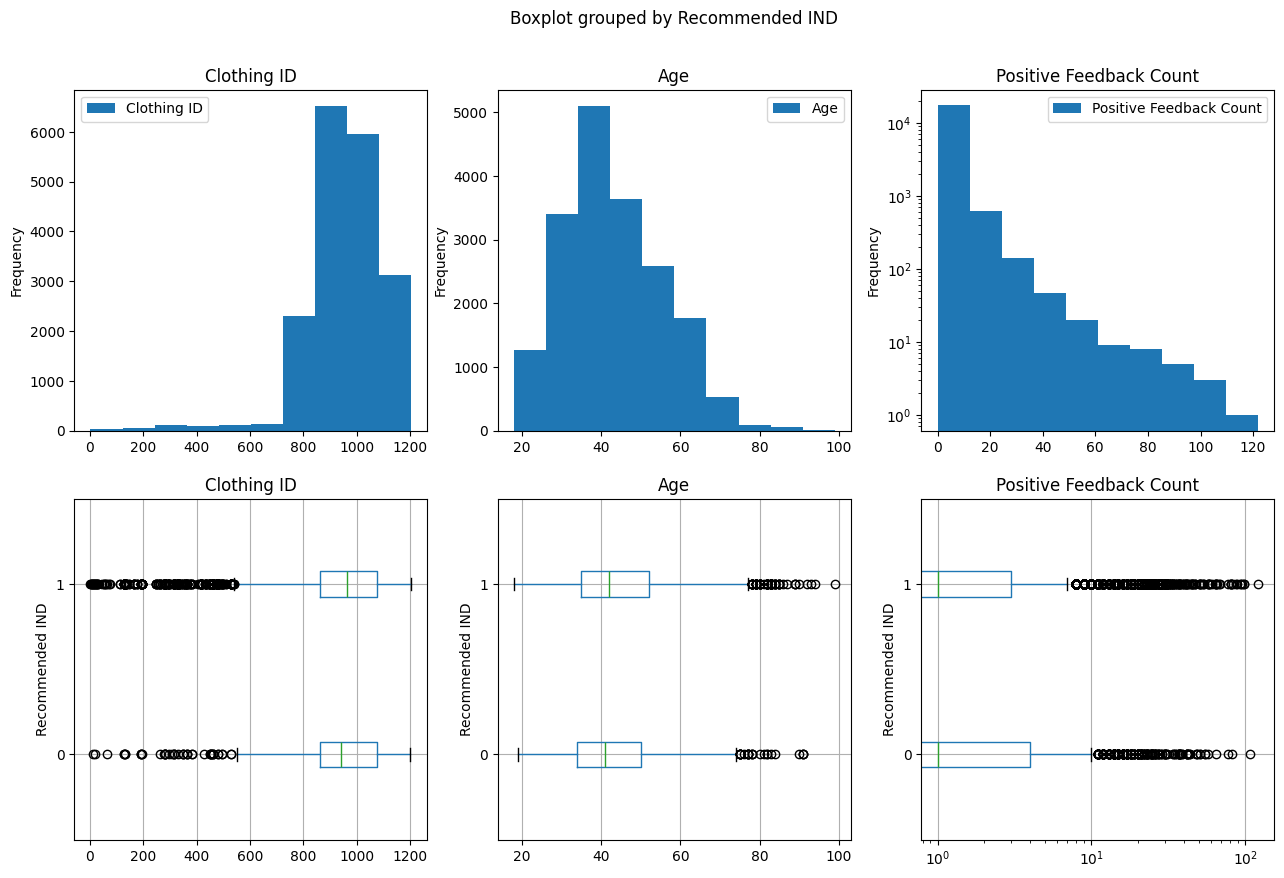

In [272]:
# Numerical features
num_features = ["Clothing ID", "Age", "Positive Feedback Count"]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

i = 0
# histogram of numerical features
for feature in num_features:
    ax = axs[i // 3, i % 3]
    if feature == "Positive Feedback Count":
        data[feature].plot.hist(ax=ax, log=True)
    else:
        data[feature].plot.hist(ax=ax)
    ax.set_title(feature)
    ax.legend()
    i += 1

# box and whisker plot of numerical features split by Recommended IND
for feature in num_features:
    ax = axs[i // 3, i % 3]
    data.boxplot(column=feature, by="Recommended IND", ax=ax, vert=False)
    if feature == "Positive Feedback Count":
        ax.set_xscale("log")
    ax.set_title("")
    ax.set_title(feature)
    ax.tick_params(axis="x", rotation=0)
    i += 1

### Numerical Features

The Numerical Features are `Clothing ID`, `Age` and `Positive Feedback Count`.

Looking at the distribution for `Age` shows a wide range of ages centered around 40 years old. Comparing the distributions of `Age` for recommended and not recommended reviews shows very little difference so it may not be a good predictor.

Looking at the distribution for `Positive Feedback Count` shows that most reviews have very little positive feedback. Comparing the distributions of `Positive Feedback Count` for recommended and not recommended reviews shows very little difference so it may not be a good predictor.

While `Clothing ID` is a numerical feature, it is actually a categorical feature. It is an identifier for the piece of clothing being reviewed. It is not useful for predicting whether a review is recommended or not.

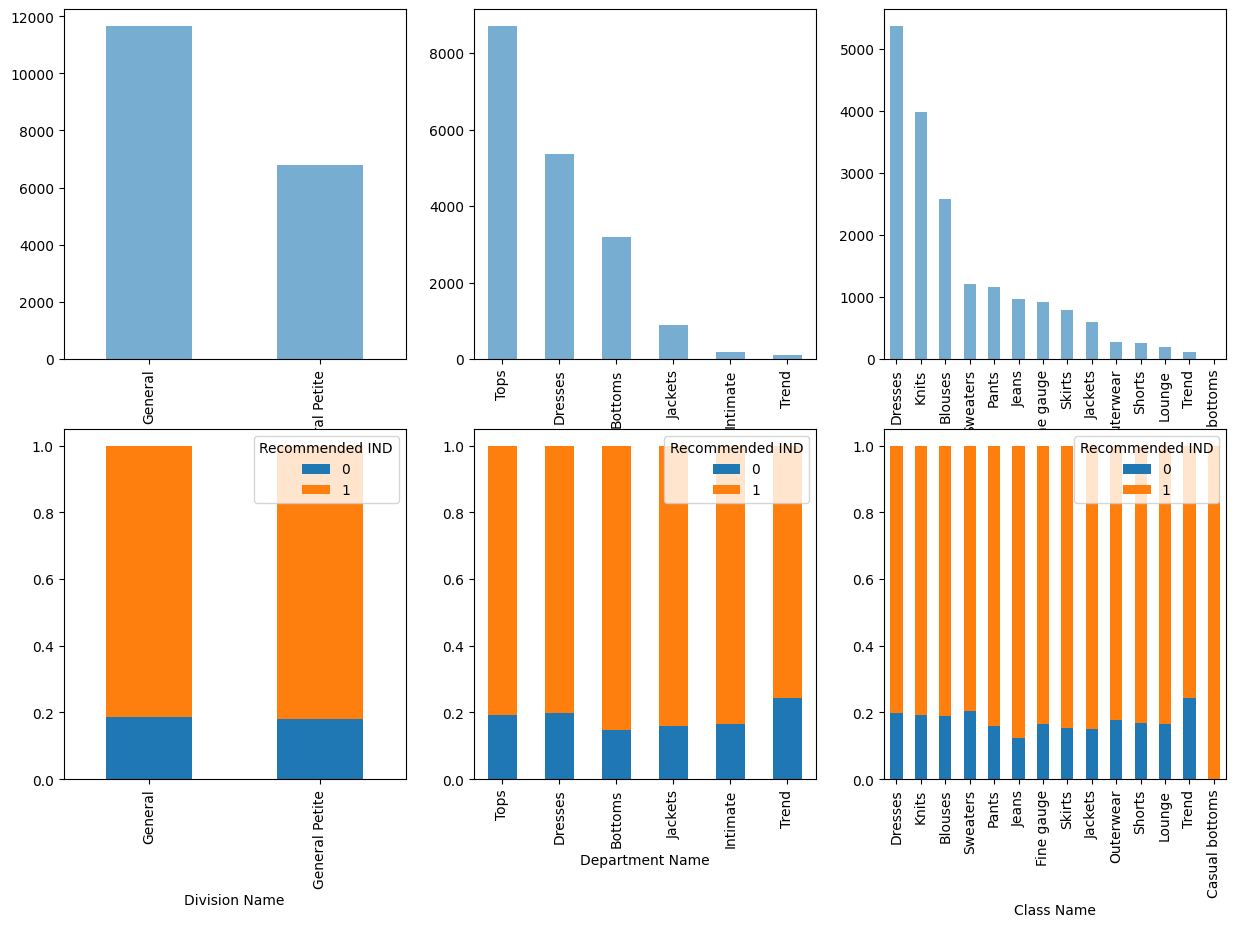

In [273]:
# Categorical features
cat_features = ["Division Name", "Department Name", "Class Name"]

cat_order_by_feature = {}

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

i = 0
# bar plot of categorical features
for feature in cat_features:
    cat_order_by_feature[feature] = data[feature].value_counts().index
    ax = axs[i // 3, i % 3]
    data[feature].value_counts().reindex(cat_order_by_feature[feature]).plot.bar(
        alpha=0.6, ax=ax
    )
    i += 1

# categorical features as percentage by Recommended IND
for feature in cat_features:
    ax = axs[i // 3, i % 3]
    data.groupby([feature, "Recommended IND"]).size().unstack().apply(
        lambda x: x / x.sum(), axis=1
    ).reindex(cat_order_by_feature[feature]).plot.bar(stacked=True, ax=ax)
    i += 1

### Categorical Features

The Categorical Features are `Division Name`, `Department Name` and `Class Name`.

`Division Name` has 2 categories for size: General and General Petite. The distribution of `Division Name` for recommended and not recommended is similar so it may not be a good predictor.

`Department Name` has 6 categories representing types of clothes: Bottoms, Dresses, Tops, Intimate, Jackets and Trend. The distribution of `Department Name` for recommended and not recommended is similar so it may not be a good predictor.

`Class Name` has 20 categories representing specific types of clothes. The distribution of `Class Name` for recommended and not recommended is similar so it may not be a good predictor.

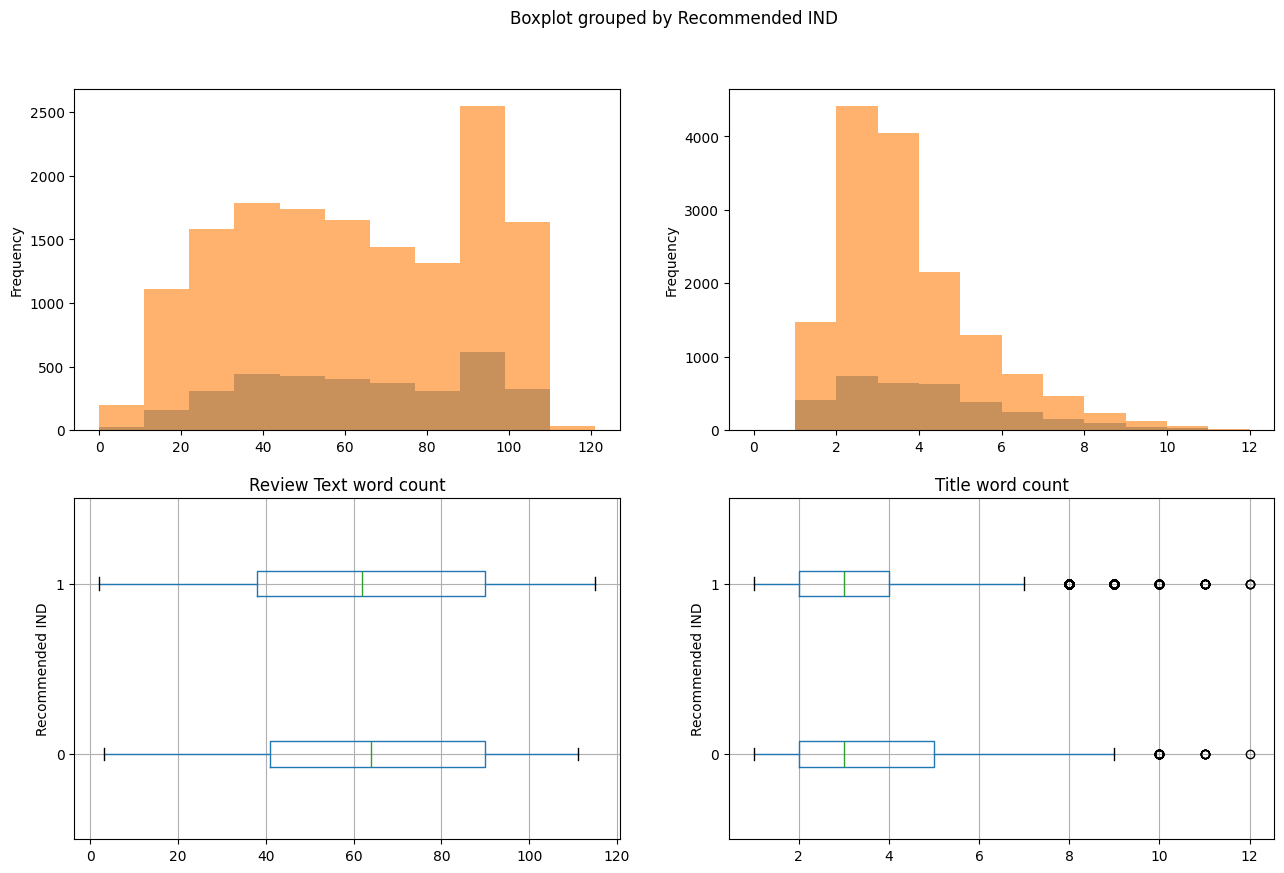

In [274]:
# Text features
text_features = ["Review Text", "Title"]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# text features
i = 0
# histogram of text features word count
for feature in text_features:
    ax = axs[i // 2, i % 2]
    # count the number of words in each review

    bin_size = data[feature].str.split().apply(len).max() // 10
    bins = range(0, data[feature].str.split().apply(len).max() + bin_size, bin_size)

    length_feature = f"{feature} word count"
    data[length_feature] = data[feature].str.split().apply(len)
    for recommended in [0, 1]:
        data[data["Recommended IND"] == recommended][length_feature].plot.hist(
            alpha=0.6, ax=ax, label=f"Recommended {recommended}", bins=bins
        )
    i += 1

# box and whisker plot of text features word count split by Recommended IND
for feature in text_features:
    ax = axs[i // 2, i % 2]
    data.boxplot(
        column=f"{feature} word count", by="Recommended IND", ax=ax, vert=False
    )
    i += 1

### Text Features - Word Count

The Text Features are `Title` and `Review Text`.

Looking at the word count distribution for `Title` shows that most titles are 2 to 4 words. Comparing the distributions of `Title` word count for recommended and not recommended reviews shows that the recommended reviews tend to have slightly shorter titles. This may be a good predictor.

Looking at the word count distribution for `Review Text` shows that most reviews are 40 to 90 words. Comparing the distributions of `Review Text` word count for recommended and not recommended reviews shows very little difference so it may not be a good predictor.

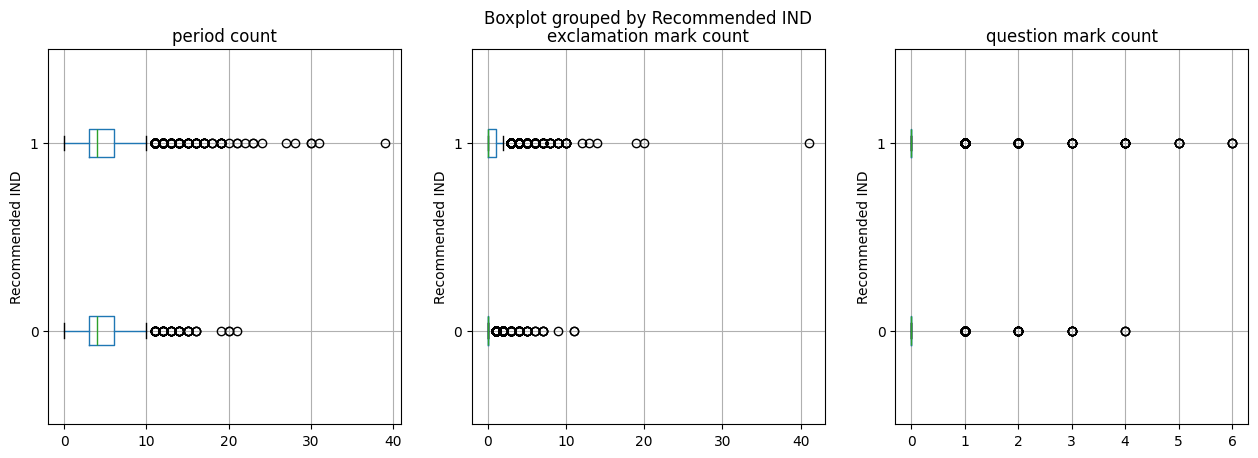

In [275]:
import re

# Punctuation
punctuation = [
    (".", "period"),
    ("!", "exclamation mark"),
    ("?", "question mark"),
]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Box and whisker plot of number of each punctuation mark per review split by Recommended IND
for i, (p_mark, p_name) in enumerate(punctuation):
    ax = axs[i]
    data[f"{p_name} count"] = data["Review Text"].str.count(re.escape(p_mark))
    data.boxplot(column=f"{p_name} count", by="Recommended IND", ax=ax, vert=False)

### Text Features - Punctaution Count

Looking at the punctuation count in the review text shows that there are more exclamation points in recommended reviews. This may be a good predictor.

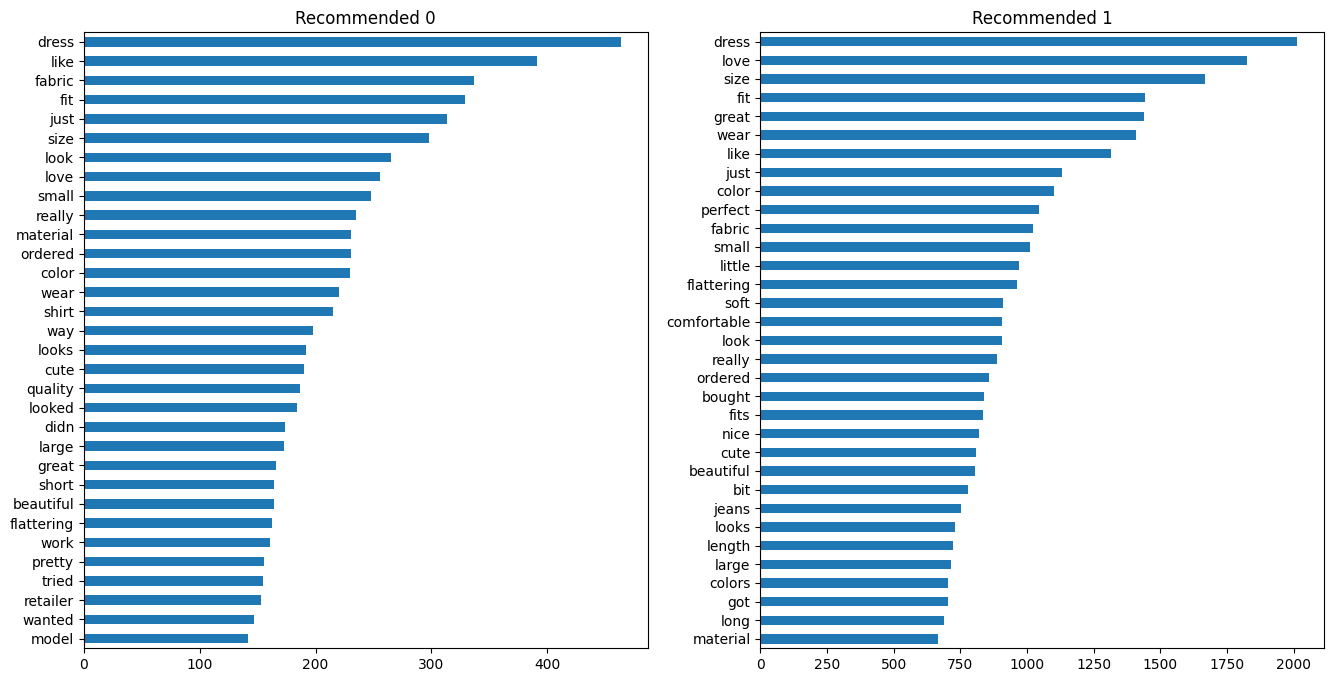

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=50,
    max_df=0.9,
    min_df=0.1,
    ngram_range=(1, 2),
)


fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# for each recommended value, plot the most common words
for recommended in [0, 1]:
    # fit the vectorizer on the training data
    X_tfidf = tfidf.fit_transform(
        data[data["Recommended IND"] == recommended]["Review Text"]
    )
    # get the most common words
    common_words = tfidf.get_feature_names_out()
    # plot the most common words
    ax = axs[recommended]
    pd.DataFrame(X_tfidf.toarray(), columns=common_words).sum().sort_values().plot.barh(
        ax=ax, title=f"Recommended {recommended}"
    )


plt.show()

### Text Features - Term Frequency-Inverse Document Frequency (TF-IDF)

Using TF-IDF on the `Review Text` we can compare the top words between recommended and not recommended reviews. If words appear more frequently in recommended reviews than not recommended reviews, then they may be good predictors.

Examples: 

Love - Appears 2nd most in recommended reviews and 8th most in not recommended reviews.

Fabric - Appears 3rd most in not recommended reviews and 11th most in recommended reviews.

Great - Appears 5th most in recommended reviews and 23rd most in not recommended reviews.

In [277]:
# check whether different POS frequencies are associated with the target
from sklearn.pipeline import FeatureUnion, Pipeline
from transformers.apply_nlp import ApplyNLP
from transformers.count_pos import CountPOS

pos_tags = ["ADJ", "NOUN", "VERB", "ADV", "ADP", "PRON", "DET", "NUM"]


# Define the pipeline
pos_pipeline = Pipeline(
    [
        ("apply_nlp", ApplyNLP(nlp)),
        (
            "pos_features",
            FeatureUnion([(pos, CountPOS(pos)) for pos in pos_tags]),
        ),
    ]
)
# Use the pipeline to transform the review text
X_pos = pos_pipeline.fit_transform(data["Review Text"])
# convert X_pos to dataframe
X_pos = pd.DataFrame(X_pos, columns=pos_tags)
X_pos["Recommended IND"] = data["Recommended IND"].values

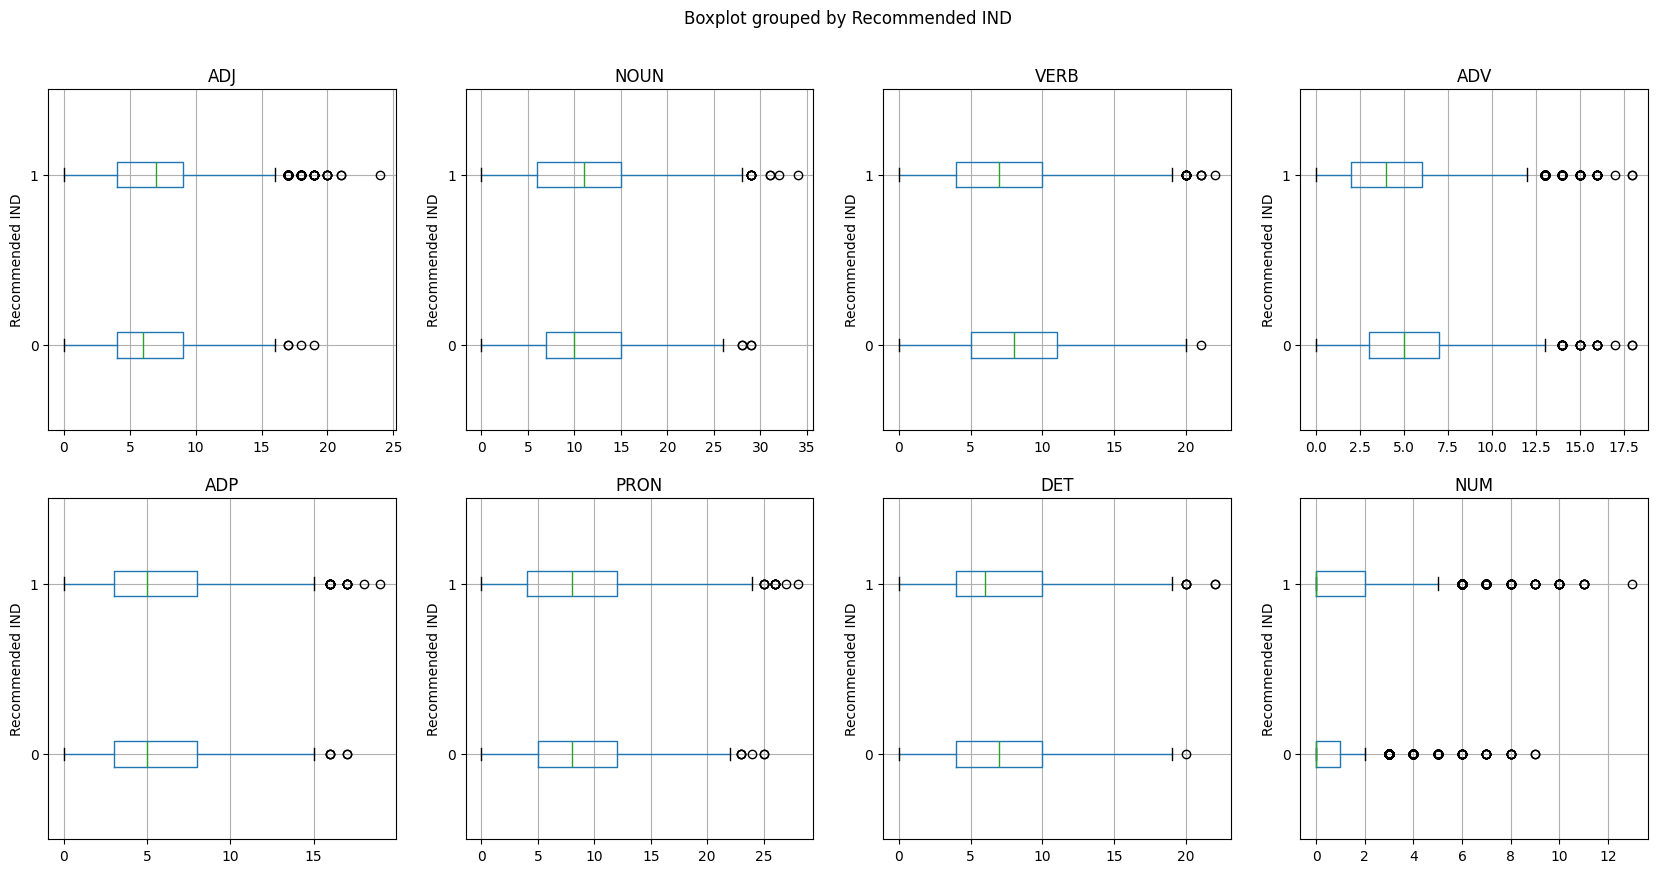

In [278]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, p in enumerate(pos_tags):
    ax = axs[i // 4, i % 4]
    X_pos.boxplot(column=p, by="Recommended IND", ax=ax, vert=False)
    ax.set_title(p)

### Text Features - POS Tagging

Using POS Tagging on the `Review Text` we can compare the top parts of speech between recommended and not recommended reviews. If parts of speech appear more frequently in recommended reviews than not recommended reviews, then they may be good predictors.

Looking at the distributions, ADJ, VERB, and NUM have the most difference between recommended and not recommended reviews.

## Building Pipeline

For the model pipeline, we will use a combination of the features to predict whether a review is recommended or not.

We will use a combination of the numerical, categorical, and text features to predict the target. For the text features, we will use the word count, punctuation count, TF-IDF, and POS Tagging.

In [279]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [280]:
from transformers.character_freq import CharacterFrequency
from transformers.text_length import TextLength
from transformers.word_count import WordCount

text_feature_engineering = FeatureUnion(
    [
        ("question_mark_count", Pipeline([("char_freq", CharacterFrequency("?"))])),
        ("exclamation_mark_count", Pipeline([("char_freq", CharacterFrequency("!"))])),
        ("text_length", TextLength()),
        ("word_count", WordCount()),
    ]
)

In [281]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FunctionTransformer
from transformers.lemmatizer import Lemmatizer

tfidf_pipeline = Pipeline(
    [
        ("lemmatizer", Lemmatizer()),
        ("tfidf", TfidfVectorizer(stop_words="english")),
    ]
)


pos_tags = ["ADJ", "VERB", "NUM"]
pos_pipelines = [
    (
        f"{pos}_count",
        Pipeline(
            [
                (pos, CountPOS(pos)),
                ("scaler", StandardScaler()),
            ]
        ),
    )
    for pos in pos_tags
]


nlp_feature_engineering = Pipeline(
    [
        (
            "dimension_reshaper",
            FunctionTransformer(
                np.reshape,
                kw_args={"newshape": -1},
            ),
        ),
        ("apply_nlp", ApplyNLP(nlp)),
        (
            "nlp_features",
            FeatureUnion(
                [
                    ("tfidf", tfidf_pipeline),
                    *pos_pipelines,
                ]
            ),
        ),
    ]
)

In [282]:
text_pipeline = Pipeline(
    [
        ("text_features", text_feature_engineering),
        ("scaler", StandardScaler()),
    ]
)

In [283]:
num_pipeline = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

In [284]:
cat_pipeline = Pipeline(
    [
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [285]:
feature_engineering = ColumnTransformer(
    [
        ("text", text_pipeline, "Review Text"),
        ("nlp", nlp_feature_engineering, "Review Text"),
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
    ]
)

feature_engineering

ColumnTransformer(transformers=[('text',
                                 Pipeline(steps=[('text_features',
                                                  FeatureUnion(transformer_list=[('question_mark_count',
                                                                                  Pipeline(steps=[('char_freq',
                                                                                                   CharacterFrequency(char='?'))])),
                                                                                 ('exclamation_mark_count',
                                                                                  Pipeline(steps=[('char_freq',
                                                                                                   CharacterFrequency(char='!'))])),
                                                                                 ('text_length',
                                                                                  TextLength()),
                                                                                 ('word_count',
                                                                                  WordCount())])),
                                                 ('scaler', Stan...
                                                                                  Pipeline(steps=[('NUM',
                                                                                                   CountPOS(pos_tag='NUM')),
                                                                                                  ('scaler',
                                                                                                   StandardScaler())]))]))]),
                                 'Review Text'),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Clothing ID', 'Age',
                                  'Positive Feedback Count']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Division Name', 'Department Name',
                                  'Class Name'])])

## Training Pipeline

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('text_features',
                                                                   FeatureUnion(transformer_list=[('question_mark_count',
                                                                                                   Pipeline(steps=[('char_freq',
                                                                                                                    CharacterFrequency(char='?'))])),
                                                                                                  ('exclamation_mark_count',
                                                                                                   Pipeline(steps=[('char_freq',
                                                                                                                    CharacterFrequency(char='!'))])),
                                                                                                  ('text_length',
                                                                                                   TextLength()),
                                                                                                  ('word_...
                                                  'Review Text'),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Clothing ID', 'Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

In [287]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


def analyze_results(y_true, y_pred):
    conf = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    precision = conf[1, 1] / (conf[1, 1] + conf[0, 1])
    recall = conf[1, 1] / (conf[1, 1] + conf[1, 0])
    f1 = 2 * precision * recall / (precision + recall)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


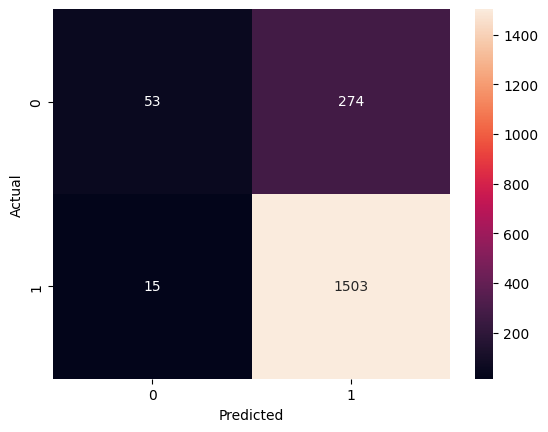

Accuracy: 0.84
Precision: 0.85
Recall: 0.99
F1 Score: 0.91


In [288]:
y_pred_forest_pipeline = model_pipeline.predict(X_test)

analyze_results(y_test, y_pred_forest_pipeline)

## Fine-Tuning Pipeline

The accuracy of the model is about 85%. We can use GridSearchCV to fine-tune the model to improve the accuracy.

In [289]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "randomforestclassifier__n_estimators": [50, 100, 200],
    "randomforestclassifier__max_depth": [10, 20, 30, 40],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__bootstrap": [True, False],
}

In [290]:
param_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions,
    n_iter=10,
    scoring="accuracy",
    n_jobs=-1,
    cv=3,
    random_state=27,
    verbose=2,
)

param_search.fit(X_train, y_train)

param_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the curre

[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=20, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=200; total time= 3.3min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time= 3.3min
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=200; total time= 3.3min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=20, randomforestclassifier__max_features=sqrt, randomforestclassifier__min

/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the curre

[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time= 3.2min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time= 3.3min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=40, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=100; total time= 3.2min
[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=log2, randomforestclassifier__min

/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the curre

[CV] END randomforestclassifier__bootstrap=False, randomforestclassifier__max_depth=30, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time= 3.2min
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time= 3.2min
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=50; total time= 3.2min
[CV] END randomforestclassifier__bootstrap=True, randomforestclassifier__max_depth=10, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samp

{'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__bootstrap': False}

/Users/stevenl/.pyenv/versions/dsnd-pipelines-project/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


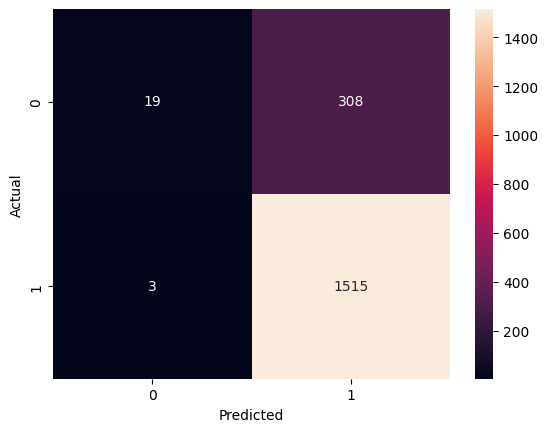

Accuracy: 0.83
Precision: 0.83
Recall: 1.00
F1 Score: 0.91


In [291]:
model_best = param_search.best_estimator_

y_pred_best = model_best.predict(X_test)

analyze_results(y_test, y_pred_best)

## Pickle Model

In [292]:
import joblib

joblib.dump(model_pipeline, "model.pkl")

['model.pkl']